# Imports

In [1]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Dataset subsamples extraction

In [2]:
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# List of indeces we casually chosen to extract the sub dataset for the evaluation
idx=[0, 5, 6, 9, 14, 17, 18, 20, 25, 31, 33, 37, 40, 45, 47, 51, 54, 61, 64, 66, 69, 72, 77, 80, 83, 85, 88, 91, 92, 95 ]

df_qwen = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET/dataset_with_qwen(TEAR).csv")  # Sostituisci con il nome del tuo file
df_llama = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET/dataset_with_LLaMA_conv_turns.csv")  # Sostituisci con il nome del tuo file
df_minerva = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET/dataset_with_minerva_few_shot_detailed_4_optimized.csv")  # Sostituisci con il nome del tuo file

# Extract the subdatasets
sub_df_qwen = df_qwen.iloc[idx]
sub_df_llama = df_llama.iloc[idx]
sub_df_minerva = df_minerva.iloc[idx]

#we will annotate these files for the analyses
sub_df_qwen.to_csv("dataset_with_qwen(TEAR)_ridotto.csv", index=False)
sub_df_llama.to_csv("dataset_with_LLaMA_conv_turns_ridotto.csv", index=False)
sub_df_minerva.to_csv("dataset_with_minerva.csv", index=False)


# Human agreement

## LLama

In [4]:
df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_LLaMA_annotated.csv")

kappa = cohen_kappa_score(df["score 1"], df["score 2"])

print(f"Cohen's Kappa: {kappa:.3f}")

Cohen's Kappa: 0.907


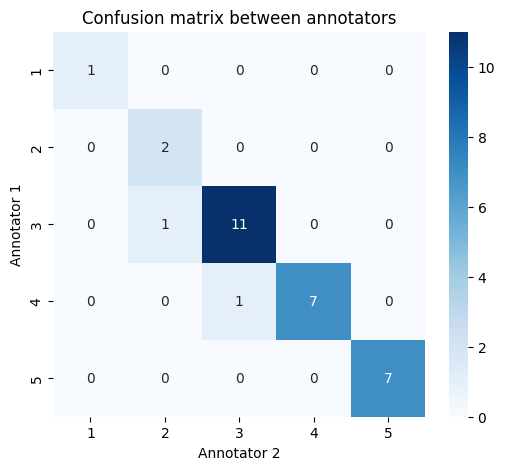

In [5]:
conf_matrix = confusion_matrix(df["score 1"], df["score 2"], labels=[1,2,3,4,5])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Annotator 2")
plt.ylabel("Annotator 1")
plt.title("Confusion matrix between annotators")
plt.show()


## Minerva

In [6]:
df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_minerva_annotated.csv")

kappa = cohen_kappa_score(df["score 1"], df["score 2"])

print(f"Cohen's Kappa: {kappa:.3f}")

Cohen's Kappa: 0.814


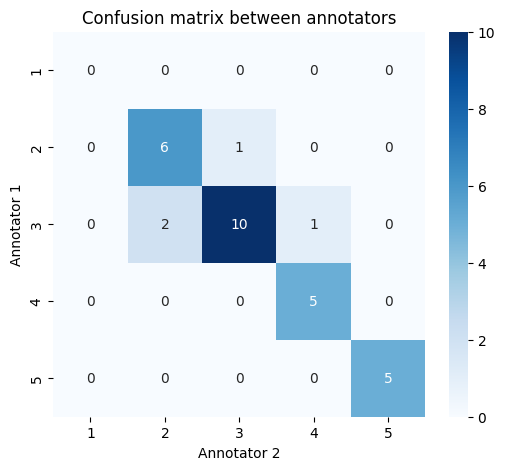

In [7]:
conf_matrix = confusion_matrix(df["score 1"], df["score 2"], labels=[1,2,3,4,5])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Annotator 2")
plt.ylabel("Annotator 1")
plt.title("Confusion matrix between annotators")
plt.show()


## Qwen

In [8]:
df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_qwen_annotated.csv")

kappa = cohen_kappa_score(df["score 1"], df["score 2"])

print(f"Cohen's Kappa: {kappa:.3f}")

Cohen's Kappa: 0.847


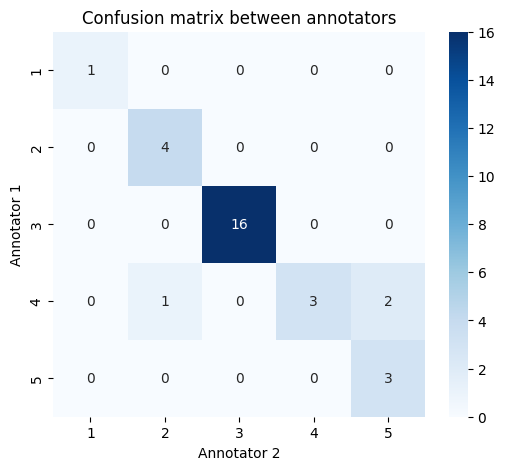

In [9]:
conf_matrix = confusion_matrix(df["score 1"], df["score 2"], labels=[1,2,3,4,5])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Annotator 2")
plt.ylabel("Annotator 1")
plt.title("Confusion matrix between annotators")
plt.show()


# Human vs LLM agreement

## **Gemini**

### LLaMa

Compute Cohen's kappa score

In [10]:
# Dataset with human annotations
human_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_LLaMA_annotated.csv")  # deve contenere almeno: 'id', 'annotator1', 'annotator2'

# Compute the mean between annotators
human_df["human_score"] = human_df[["score 1", "score 2"]].mean(axis=1).round().astype(int)

# Dataset with gemini score
llm_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/Dataset evaluated/LLaMA_eval_gem.csv")  # deve contenere almeno: 'id', 'llm_score'

# Merge the dataset with human score and with gemini score
merged = pd.merge(human_df, llm_df, on="Sentence")

# Compute cohen's kappa
kappa = cohen_kappa_score(merged["human_score"], merged["gemini_score"])
print(f"Cohen's Kappa: {kappa:.3f}")

merged.to_csv("LLaMA_merged_gem.csv", index=False)


Cohen's Kappa: 0.330


Compute MAE

In [11]:
mae = mean_absolute_error(merged["human_score"], merged["gemini_score"])
print(f"MAE: {mae:.3f}")

MAE: 0.700


Compute the score distribution

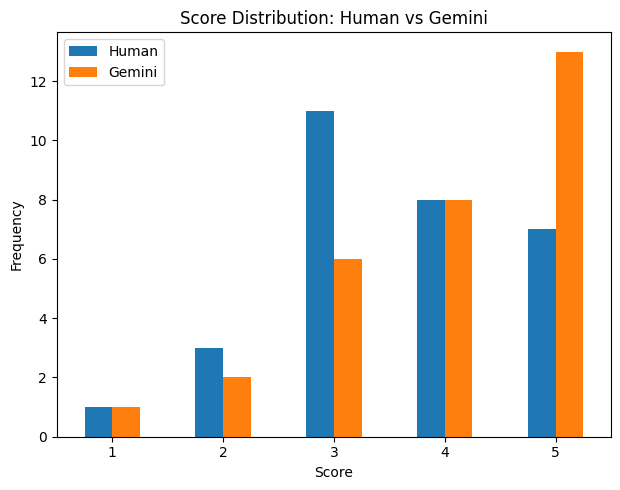

In [12]:
score_counts = pd.DataFrame({
    "Human": merged["human_score"].value_counts().sort_index(),
    "Gemini": merged["gemini_score"].value_counts().sort_index()
})

# Plotting
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
score_counts.plot(kind="bar", ax=plt.gca())
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution: Human vs Gemini")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### MINERVA

In [13]:
human_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_minerva_annotated.csv")  # deve contenere almeno: 'id', 'annotator1', 'annotator2'

human_df["human_score"] = human_df[["score 1", "score 2"]].mean(axis=1).round().astype(int)

llm_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/Dataset evaluated/Minerva_eval_gem.csv")  # deve contenere almeno: 'id', 'llm_score'

merged = pd.merge(human_df, llm_df, on="Sentence")

kappa = cohen_kappa_score(merged["human_score"], merged["gemini_score"])
print(f"Cohen's Kappa: {kappa:.3f}")

merged.to_csv("minerva_merged_gem.csv", index=False)

Cohen's Kappa: 0.264


In [14]:
mae = mean_absolute_error(merged["human_score"], merged["gemini_score"])
print(f"MAE: {mae:.3f}")

MAE: 0.667


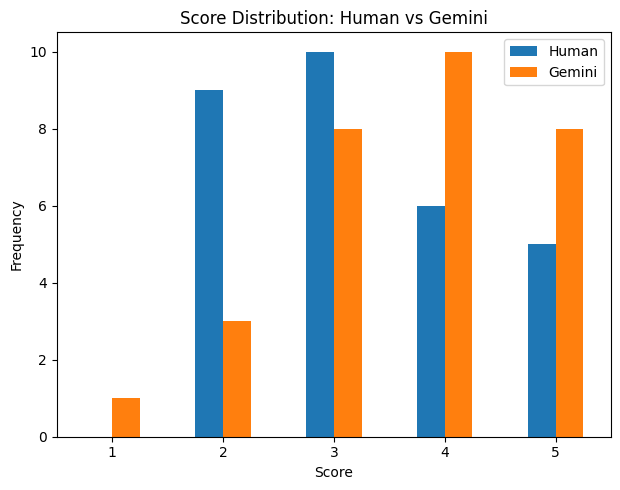

In [15]:
score_counts = pd.DataFrame({
    "Human": merged["human_score"].value_counts().sort_index(),
    "Gemini": merged["gemini_score"].value_counts().sort_index()
})

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
score_counts.plot(kind="bar", ax=plt.gca())
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution: Human vs Gemini")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Qwen

In [16]:
human_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_qwen_annotated.csv")  # deve contenere almeno: 'id', 'annotator1', 'annotator2'

human_df["human_score"] = human_df[["score 1", "score 2"]].mean(axis=1).round().astype(int)

llm_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/Dataset evaluated/Qwen_eval_gem.csv")  # deve contenere almeno: 'id', 'llm_score'

merged = pd.merge(human_df, llm_df, on="Sentence")

kappa = cohen_kappa_score(merged["human_score"], merged["gemini_score"])
print(f"Cohen's Kappa: {kappa:.3f}")

merged.to_csv("qwen_merged_gem.csv", index=False)

Cohen's Kappa: 0.288


In [17]:
mae = mean_absolute_error(merged["human_score"], merged["gemini_score"])
print(f"MAE: {mae:.3f}")


MAE: 0.667


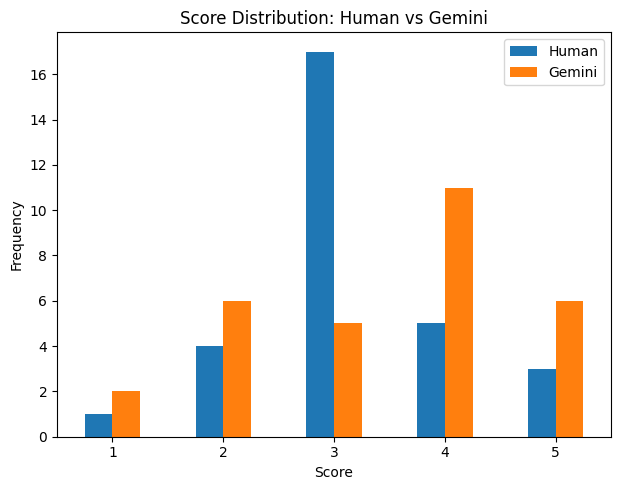

In [18]:
score_counts = pd.DataFrame({
    "Human": merged["human_score"].value_counts().sort_index(),
    "Gemini": merged["gemini_score"].value_counts().sort_index()
})


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
score_counts.plot(kind="bar", ax=plt.gca())
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution: Human vs Gemini")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



## **Prometheus**

### LLaMa

In [19]:
human_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_LLaMA_annotated.csv")  # deve contenere almeno: 'id', 'annotator1', 'annotator2'

human_df["human_score"] = human_df[["score 1", "score 2"]].mean(axis=1).round().astype(int)

llm_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/Dataset evaluated/LLaMA_eval_prom.csv")  # deve contenere almeno: 'id', 'llm_score'


merged = pd.merge(human_df, llm_df, on="Sentence")

kappa = cohen_kappa_score(merged["human_score"], merged["prometheus_score"])
print(f"Cohen's Kappa: {kappa:.3f}")

merged.to_csv("LLaMA_merged_prom.csv", index=False)

Cohen's Kappa: 0.265


In [20]:
mae = mean_absolute_error(merged["human_score"], merged["prometheus_score"])
print(f"MAE: {mae:.3f}")

MAE: 0.767


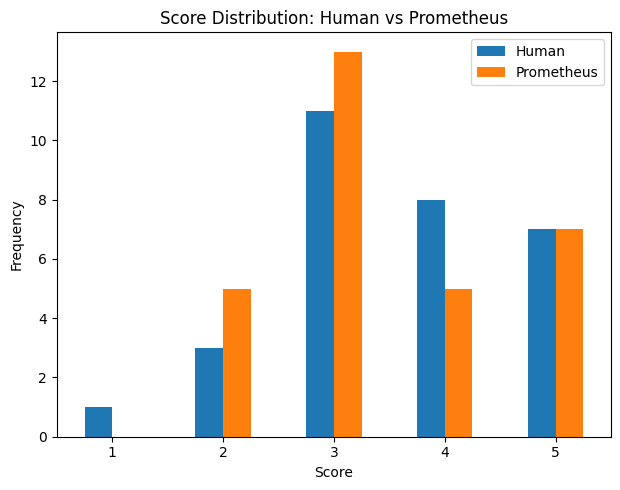

In [21]:
score_counts = pd.DataFrame({
    "Human": merged["human_score"].value_counts().sort_index(),
    "Prometheus": merged["prometheus_score"].value_counts().sort_index()
})

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
score_counts.plot(kind="bar", ax=plt.gca())
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution: Human vs Prometheus")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### MINERVA



In [22]:
human_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_minerva_annotated.csv")  # deve contenere almeno: 'id', 'annotator1', 'annotator2'

human_df["human_score"] = human_df[["score 1", "score 2"]].mean(axis=1).round().astype(int)

llm_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/Dataset evaluated/Minerva_eval_prom.csv")  # deve contenere almeno: 'id', 'llm_score'

merged = pd.merge(human_df, llm_df, on="Sentence")

kappa = cohen_kappa_score(merged["human_score"], merged["prometheus_score"])
print(f"Cohen's Kappa: {kappa:.3f}")

merged.to_csv("minerva_merged_prom.csv", index=False)

Cohen's Kappa: 0.396


In [23]:
mae = mean_absolute_error(merged["human_score"], merged["prometheus_score"])
print(f"MAE: {mae:.3f}")

MAE: 0.700


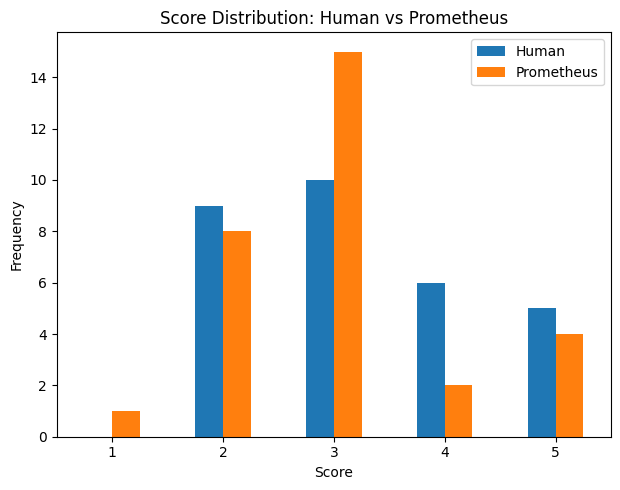

In [24]:
score_counts = pd.DataFrame({
    "Human": merged["human_score"].value_counts().sort_index(),
    "Prometheus": merged["prometheus_score"].value_counts().sort_index()
})

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
score_counts.plot(kind="bar", ax=plt.gca())
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution: Human vs Prometheus")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### Qwen

In [25]:
human_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_qwen_annotated.csv")  # deve contenere almeno: 'id', 'annotator1', 'annotator2'

human_df["human_score"] = human_df[["score 1", "score 2"]].mean(axis=1).round().astype(int)

llm_df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/Dataset evaluated/Qwen_eval_prom.csv")  # deve contenere almeno: 'id', 'llm_score'

merged = pd.merge(human_df, llm_df, on="Sentence")

kappa = cohen_kappa_score(merged["human_score"], merged["prometheus_score"])
print(f"Cohen's Kappa: {kappa:.3f}")

merged.to_csv("qwen_merged_prom.csv", index=False)

Cohen's Kappa: 0.255


In [26]:
mae = mean_absolute_error(merged["human_score"], merged["prometheus_score"])
print(f"MAE: {mae:.3f}")


MAE: 0.500


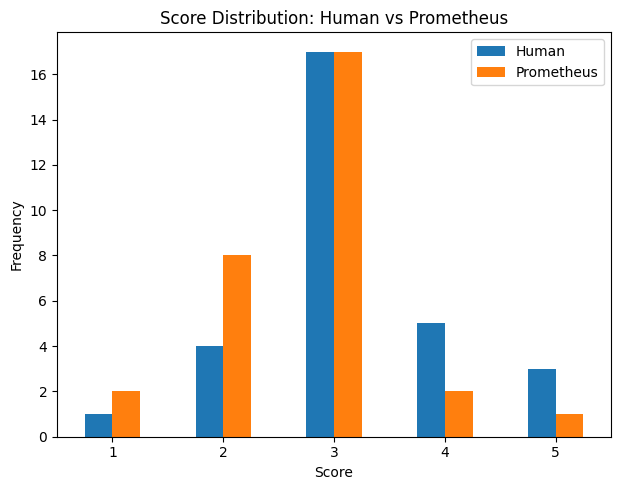

In [27]:
score_counts = pd.DataFrame({
    "Human": merged["human_score"].value_counts().sort_index(),
    "Prometheus": merged["prometheus_score"].value_counts().sort_index()
})


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
score_counts.plot(kind="bar", ax=plt.gca())
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution: Human vs Prometheus")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Average human rating





## LLaMa

In [28]:
df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_LLaMA_annotated.csv")

# Compute the average score per row
df['row_avg'] = df[['score 1', 'score 2']].mean(axis=1)

# Compute the overall average of all row averages
overall_avg = df['row_avg'].mean()

# Count how many row averages are between 4 and 5 (inclusive)
count_between_4_and_5 = df[(df['row_avg'] >= 4) & (df['row_avg'] <= 5)].shape[0]

print("Row averages:")
print(df[['score 1', 'score 2', 'row_avg']])
print(f"\nOverall average: {overall_avg:.2f}")
print(f"Number of rows with average between 4 and 5: {count_between_4_and_5}")


Row averages:
    score 1  score 2  row_avg
0         3        3      3.0
1         3        3      3.0
2         3        3      3.0
3         5        5      5.0
4         3        3      3.0
5         3        3      3.0
6         5        5      5.0
7         5        5      5.0
8         5        5      5.0
9         3        3      3.0
10        3        2      2.5
11        5        5      5.0
12        1        1      1.0
13        5        5      5.0
14        4        4      4.0
15        4        4      4.0
16        4        4      4.0
17        3        3      3.0
18        4        3      3.5
19        5        5      5.0
20        3        3      3.0
21        4        4      4.0
22        3        3      3.0
23        2        2      2.0
24        4        4      4.0
25        4        4      4.0
26        4        4      4.0
27        3        3      3.0
28        3        3      3.0
29        2        2      2.0

Overall average: 3.57
Number of rows with average betwe

## MINERVA

In [29]:
df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_minerva_annotated.csv")

df['row_avg'] = df[['score 1', 'score 2']].mean(axis=1)

overall_avg = df['row_avg'].mean()

count_between_4_and_5 = df[(df['row_avg'] >= 4) & (df['row_avg'] <= 5)].shape[0]

print("Row averages:")
print(df[['score 1', 'score 2', 'row_avg']])
print(f"\nOverall average: {overall_avg:.2f}")
print(f"Number of rows with average between 4 and 5: {count_between_4_and_5}")


Row averages:
    score 1  score 2  row_avg
0         3        3      3.0
1         2        2      2.0
2         3        3      3.0
3         5        5      5.0
4         2        2      2.0
5         3        2      2.5
6         5        5      5.0
7         3        3      3.0
8         2        3      2.5
9         4        4      4.0
10        2        2      2.0
11        4        4      4.0
12        2        2      2.0
13        3        3      3.0
14        2        2      2.0
15        4        4      4.0
16        5        5      5.0
17        3        4      3.5
18        2        2      2.0
19        5        5      5.0
20        3        3      3.0
21        4        4      4.0
22        3        3      3.0
23        3        3      3.0
24        5        5      5.0
25        4        4      4.0
26        3        2      2.5
27        3        3      3.0
28        3        3      3.0
29        3        3      3.0

Overall average: 3.27
Number of rows with average betwe

## Qwen

In [30]:
df = pd.read_csv("/content/drive/MyDrive/AleBERTs&FraBERT_shared_folder_HW2/DATASET_RIDOTTI/dataset_with_qwen_annotated.csv")

df['row_avg'] = df[['score 1', 'score 2']].mean(axis=1)

overall_avg = df['row_avg'].mean()

count_between_4_and_5 = df[(df['row_avg'] >= 4) & (df['row_avg'] <= 5)].shape[0]

print("Row averages:")
print(df[['score 1', 'score 2', 'row_avg']])
print(f"\nOverall average: {overall_avg:.2f}")
print(f"Number of rows with average between 4 and 5: {count_between_4_and_5}")

Row averages:
    score 1  score 2  row_avg
0         3        3      3.0
1         3        3      3.0
2         3        3      3.0
3         3        3      3.0
4         3        3      3.0
5         3        3      3.0
6         4        2      3.0
7         4        4      4.0
8         3        3      3.0
9         4        5      4.5
10        2        2      2.0
11        3        3      3.0
12        1        1      1.0
13        2        2      2.0
14        4        4      4.0
15        3        3      3.0
16        5        5      5.0
17        3        3      3.0
18        2        2      2.0
19        5        5      5.0
20        4        4      4.0
21        3        3      3.0
22        2        2      2.0
23        3        3      3.0
24        5        5      5.0
25        4        5      4.5
26        3        3      3.0
27        3        3      3.0
28        3        3      3.0
29        3        3      3.0

Overall average: 3.20
Number of rows with average betwe

# Average Prometheus rating

## LLaMa

In [31]:
df = pd.read_csv("/content/LLaMA_merged_prom.csv")

# Check if the column exists
if 'prometheus_score' in df.columns:
    # Compute the average of the 'prometheus score' column
    average_prometheus = df['prometheus_score'].mean()

    # Count how many values are exactly 4 or 5
    count_4_or_5 = df[df['prometheus_score'].isin([4, 5])].shape[0]

    # Output
    print(f"Average of 'prometheus score': {average_prometheus:.2f}")
    print(f"Number of times 'prometheus score' is 4 or 5: {count_4_or_5}")
else:
    print("Column 'prometheus score' not found in the CSV.")


Average of 'prometheus score': 3.47
Number of times 'prometheus score' is 4 or 5: 12


## MINERVA

In [32]:
df = pd.read_csv("/content/minerva_merged_prom.csv")

# Check if the column exists
if 'prometheus_score' in df.columns:
    # Compute the average of the 'prometheus score' column
    average_prometheus = df['prometheus_score'].mean()

    # Count how many values are exactly 4 or 5
    count_4_or_5 = df[df['prometheus_score'].isin([4, 5])].shape[0]

    # Output
    print(f"Average of 'prometheus score': {average_prometheus:.2f}")
    print(f"Number of times 'prometheus score' is 4 or 5: {count_4_or_5}")
else:
    print("Column 'prometheus score' not found in the CSV.")


Average of 'prometheus score': 3.00
Number of times 'prometheus score' is 4 or 5: 6


## Qwen

In [33]:
df = pd.read_csv("/content/qwen_merged_prom.csv")

# Check if the column exists
if 'prometheus_score' in df.columns:
    # Compute the average of the 'prometheus score' column
    average_prometheus = df['prometheus_score'].mean()

    # Count how many values are exactly 4 or 5
    count_4_or_5 = df[df['prometheus_score'].isin([4, 5])].shape[0]

    # Output
    print(f"Average of 'prometheus score': {average_prometheus:.2f}")
    print(f"Number of times 'prometheus score' is 4 or 5: {count_4_or_5}")
else:
    print("Column 'prometheus score' not found in the CSV.")


Average of 'prometheus score': 2.73
Number of times 'prometheus score' is 4 or 5: 3
